# US Car Advertisement Dataset
# Exploratory Data Analysis

## Introduction

The dataset analyzed in this project involves car sales data related to make, model, and year of a car as well as other defining characteristics typically included in a car sale ad.  This exploratory data analysis will work to determine the features of the data, identify issues and remedy those issues, as well as display various visual representations of the dataset.  Also, initial observations and meaningful takeaways will be provided at the end based on this analysis.

## Load the Packages

In [1]:
!pip install streamlit

In [2]:
!pip install plotly-express

## Load the Data

In [3]:
import pandas as pd
import numpy as np 
from math import factorial
import streamlit as st
import plotly_express as px

from matplotlib import pyplot as plt
import seaborn as sns

## Initial Data Analysis

In [4]:
df_car_ads = pd.read_csv('vehicles_us.csv')

In [5]:
display(df_car_ads)
print()
df_car_ads.info()
print()
df_car_ads.describe()

price  model_year           model  condition  cylinders fuel  odometer  \
0       9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1      25500         NaN      ford f-150       good        6.0  gas   88705.0   
2       5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3       1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4      14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   
...      ...         ...             ...        ...        ...  ...       ...   
51520   9249      2013.0   nissan maxima   like new        6.0  gas   88136.0   
51521   2700      2002.0     honda civic    salvage        4.0  gas  181500.0   
51522   3950      2009.0  hyundai sonata  excellent        4.0  gas  128000.0   
51523   7455      2013.0  toyota corolla       good        4.0  gas  139573.0   
51524   6300      2014.0   nissan altima       good        4.0  gas       NaN   

      transmission    type paint_color  is_4wd date_posted  days_listed  
0        automatic     SUV         NaN     1.0  2018-06-23           19  
1        automatic  pickup       white     1.0  2018-10-19           50  
2        automatic   sedan         red     NaN  2019-02-07           79  
3        automatic  pickup         NaN     NaN  2019-03-22            9  
4        automatic   sedan       black     NaN  2019-04-02           28  
...            ...     ...         ...     ...         ...          ...  
51520    automatic   sedan       black     NaN  2018-10-03           37  
51521    automatic   sedan       white     NaN  2018-11-14           22  
51522    automatic   sedan        blue     NaN  2018-11-15           32  
51523    automatic   sedan       black     NaN  2018-07-02           71  
51524    automatic   sedan         NaN     NaN  2018-06-05           10  

[51525 rows x 13 columns]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB



price    model_year     cylinders       odometer   is_4wd  \
count   51525.000000  47906.000000  46265.000000   43633.000000  25572.0   
mean    12132.464920   2009.750470      6.125235  115553.461738      1.0   
std     10040.803015      6.282065      1.660360   65094.611341      0.0   
min         1.000000   1908.000000      3.000000       0.000000      1.0   
25%      5000.000000   2006.000000      4.000000   70000.000000      1.0   
50%      9000.000000   2011.000000      6.000000  113000.000000      1.0   
75%     16839.000000   2014.000000      8.000000  155000.000000      1.0   
max    375000.000000   2019.000000     12.000000  990000.000000      1.0   

       days_listed  
count  51525.00000  
mean      39.55476  
std       28.20427  
min        0.00000  
25%       19.00000  
50%       33.00000  
75%       53.00000  
max      271.00000

#### Summary

Initial data observations demonstrate that ads typically include make, model, year, condition, number of cylinders in the engine, type of fuel, measure of the odometer, the transmission type, car body type, color, is 2-wheel drive (2WD) or 4-wheel drive (4WD), and the number of the days spent on the market.

There are several areas that will need to be addressed when the data is fixed, which includes addressing missing values in the odometer column and the is_4wd column, and adjusting the date posted to datetime. 

## Fix the Data

### Duplicates

In [6]:
df_car_ads.duplicated().sum()

0

### Missingness

In [7]:
df_car_ads.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

#### Addressing Missingness in 'Odomenter" column

In [8]:
avg_odometer= df_car_ads ['odometer'].mean()

In [9]:
avg_odometer_rounded= round(avg_odometer,2)

display(avg_odometer_rounded)

115553.46

In [10]:
df_car_ads['odometer'] = df_car_ads['odometer'].fillna(avg_odometer_rounded)

df_car_ads.sample(10)

price  model_year              model  condition  cylinders fuel  \
33014   2995      2002.0        ford taurus  excellent        6.0  gas   
5716   24900      2017.0  toyota highlander  excellent        6.0  gas   
22692  10900      2018.0       nissan versa  excellent        4.0  gas   
8980    1995      2006.0       honda accord       good        4.0  gas   
50882  14995      2008.0      jeep wrangler  excellent        NaN  gas   
32519  16777      2017.0   chevrolet malibu  excellent        4.0  gas   
38439  11900      2015.0     honda civic lx       good        4.0  gas   
47110   8995      2005.0      toyota tundra       good        8.0  gas   
41217   3500      1994.0         ford f-250       good        8.0  gas   
37068  11864      2010.0        honda pilot       good        6.0  gas   

        odometer transmission    type paint_color  is_4wd date_posted  \
33014   29402.00    automatic   sedan        blue     NaN  2018-06-04   
5716    35552.00    automatic     SUV       black     1.0  2018-11-26   
22692   10800.00    automatic   sedan      silver     NaN  2018-11-19   
8980   140000.00    automatic   coupe       white     NaN  2019-03-08   
50882  115553.46    automatic     SUV       green     1.0  2018-10-03   
32519   53115.00    automatic   sedan      silver     NaN  2018-08-16   
38439   52000.00    automatic   sedan         NaN     NaN  2018-06-07   
47110  172000.00    automatic  pickup         red     1.0  2019-02-24   
41217  165000.00    automatic   truck       white     NaN  2018-10-04   
37068  147783.00    automatic     SUV      custom     1.0  2018-09-24   

       days_listed  
33014           32  
5716            17  
22692           36  
8980            17  
50882           16  
32519            5  
38439           68  
47110           19  
41217           16  
37068           37

#### Converting the "date_posted" column to datetime format

In [11]:
df_car_ads['date_posted'] = pd.to_datetime(df_car_ads['date_posted'], format ='%Y-%m-%d')

#### Separate the make and model into two separate columns

In [12]:
df_car_ads['make']= df_car_ads.model.str.split().str.get(0)

In [13]:
df_car_ads['model_ind']= df_car_ads.model.str.split().str.get(1)
#model_ind is a new column name which only identifies the model of the car independent (ind) of the make

display(df_car_ads.head(10))

price  model_year           model  condition  cylinders fuel   odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.00   
1  25500         NaN      ford f-150       good        6.0  gas   88705.00   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.00   
3   1500      2003.0      ford f-150       fair        8.0  gas  115553.46   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.00   
5  14990      2014.0    chrysler 300  excellent        6.0  gas   57954.00   
6  12990      2015.0    toyota camry  excellent        4.0  gas   79212.00   
7  15990      2013.0     honda pilot  excellent        6.0  gas  109473.00   
8  11500      2012.0     kia sorento  excellent        4.0  gas  104174.00   
9   9200      2008.0     honda pilot  excellent        NaN  gas  147191.00   

  transmission    type paint_color  is_4wd date_posted  days_listed      make  \
0    automatic     SUV         NaN     1.0  2018-06-23           19       bmw   
1    automatic  pickup       white     1.0  2018-10-19           50      ford   
2    automatic   sedan         red     NaN  2019-02-07           79   hyundai   
3    automatic  pickup         NaN     NaN  2019-03-22            9      ford   
4    automatic   sedan       black     NaN  2019-04-02           28  chrysler   
5    automatic   sedan       black     1.0  2018-06-20           15  chrysler   
6    automatic   sedan       white     NaN  2018-12-27           73    toyota   
7    automatic     SUV       black     1.0  2019-01-07           68     honda   
8    automatic     SUV         NaN     1.0  2018-07-16           19       kia   
9    automatic     SUV        blue     1.0  2019-02-15           17     honda   

  model_ind  
0        x5  
1     f-150  
2    sonata  
3     f-150  
4       200  
5       300  
6     camry  
7     pilot  
8   sorento  
9     pilot

#### Address Missingness in "Cylinders" column

* use ffill() to fill in NaN values for the 'cylinders' column using like information in the 'model' column.  For example, row 9 shown above for the Honda Pilot has NaN for cylinders, but the same model listed in row 7 has cylinders listed as 6.0.  Using ffill() takes the value from row 7 and inputs it in row 9 to replace the missingness.
<br><br>
* The new table shown below indicates this change, and rerunning info() shows that there are no more missing values in cylinders.

In [14]:
df_car_ads['cylinders'] = df_car_ads.groupby('model')['cylinders'].ffill()

display(df_car_ads.head(10))

df_car_ads.info()

price  model_year           model  condition  cylinders fuel   odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.00   
1  25500         NaN      ford f-150       good        6.0  gas   88705.00   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.00   
3   1500      2003.0      ford f-150       fair        8.0  gas  115553.46   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.00   
5  14990      2014.0    chrysler 300  excellent        6.0  gas   57954.00   
6  12990      2015.0    toyota camry  excellent        4.0  gas   79212.00   
7  15990      2013.0     honda pilot  excellent        6.0  gas  109473.00   
8  11500      2012.0     kia sorento  excellent        4.0  gas  104174.00   
9   9200      2008.0     honda pilot  excellent        6.0  gas  147191.00   

  transmission    type paint_color  is_4wd date_posted  days_listed      make  \
0    automatic     SUV         NaN     1.0  2018-06-23           19       bmw   
1    automatic  pickup       white     1.0  2018-10-19           50      ford   
2    automatic   sedan         red     NaN  2019-02-07           79   hyundai   
3    automatic  pickup         NaN     NaN  2019-03-22            9      ford   
4    automatic   sedan       black     NaN  2019-04-02           28  chrysler   
5    automatic   sedan       black     1.0  2018-06-20           15  chrysler   
6    automatic   sedan       white     NaN  2018-12-27           73    toyota   
7    automatic     SUV       black     1.0  2019-01-07           68     honda   
8    automatic     SUV         NaN     1.0  2018-07-16           19       kia   
9    automatic     SUV        blue     1.0  2019-02-15           17     honda   

  model_ind  
0        x5  
1     f-150  
2    sonata  
3     f-150  
4       200  
5       300  
6     camry  
7     pilot  
8   sorento  
9     pilot

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    47906 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51518 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        25572 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  make          51525 non-null  object        
 14  model_ind     51525 non-null  object        
dtypes: datetime64[ns](1), float64(4), in

#### Addressing Missingness in "is_4wd" column

In [15]:
df_car_ads['is_4wd'] = df_car_ads.groupby('model')['is_4wd'].ffill()

display(df_car_ads.head(10))

df_car_ads.info()

price  model_year           model  condition  cylinders fuel   odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.00   
1  25500         NaN      ford f-150       good        6.0  gas   88705.00   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.00   
3   1500      2003.0      ford f-150       fair        8.0  gas  115553.46   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.00   
5  14990      2014.0    chrysler 300  excellent        6.0  gas   57954.00   
6  12990      2015.0    toyota camry  excellent        4.0  gas   79212.00   
7  15990      2013.0     honda pilot  excellent        6.0  gas  109473.00   
8  11500      2012.0     kia sorento  excellent        4.0  gas  104174.00   
9   9200      2008.0     honda pilot  excellent        6.0  gas  147191.00   

  transmission    type paint_color  is_4wd date_posted  days_listed      make  \
0    automatic     SUV         NaN     1.0  2018-06-23           19       bmw   
1    automatic  pickup       white     1.0  2018-10-19           50      ford   
2    automatic   sedan         red     NaN  2019-02-07           79   hyundai   
3    automatic  pickup         NaN     1.0  2019-03-22            9      ford   
4    automatic   sedan       black     NaN  2019-04-02           28  chrysler   
5    automatic   sedan       black     1.0  2018-06-20           15  chrysler   
6    automatic   sedan       white     NaN  2018-12-27           73    toyota   
7    automatic     SUV       black     1.0  2019-01-07           68     honda   
8    automatic     SUV         NaN     1.0  2018-07-16           19       kia   
9    automatic     SUV        blue     1.0  2019-02-15           17     honda   

  model_ind  
0        x5  
1     f-150  
2    sonata  
3     f-150  
4       200  
5       300  
6     camry  
7     pilot  
8   sorento  
9     pilot

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    47906 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51518 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        47034 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  make          51525 non-null  object        
 14  model_ind     51525 non-null  object        
dtypes: datetime64[ns](1), float64(4), in

* When trying to apply the same ffill() method to the 'is_4wd' column, values were not input for any of the missing values, which indicates that there are no models with missing 'is_4wd' data which can pull from a fully completed row of the same model car.  For example, as shown below, there are 4,491 cars with NaN values in the 'is_4wd' column.  When looking at a random model, I see when querying for Toyota Prius, there are 482 entries.  When I conduct a mulitple condition query for those cars that are Toyota Prius and do not have a 1 in the 'is_4wd' column, I return all 482 entries.
<br><br>
* It would be feasible to assume that all cars with a NaN value in this column would actually be a 0, indicating that they are not 4wd cars.  So I will replace those NaN values with 0's.

In [16]:
df_car_ads.query("is_4wd != 1")[['model', 'is_4wd']]

model  is_4wd
2                    hyundai sonata     NaN
4                      chrysler 200     NaN
6                      toyota camry     NaN
11                     honda accord     NaN
13                   hyundai sonata     NaN
...                             ...     ...
51317                  toyota prius     NaN
51357                  toyota prius     NaN
51382                  toyota prius     NaN
51400              chevrolet impala     NaN
51511  chevrolet camaro lt coupe 2d     NaN

[4491 rows x 2 columns]

In [17]:
df_car_ads.query("model == 'toyota prius'")[['model','is_4wd']]

model  is_4wd
234    toyota prius     NaN
235    toyota prius     NaN
277    toyota prius     NaN
363    toyota prius     NaN
442    toyota prius     NaN
...             ...     ...
51019  toyota prius     NaN
51142  toyota prius     NaN
51317  toyota prius     NaN
51357  toyota prius     NaN
51382  toyota prius     NaN

[482 rows x 2 columns]

In [18]:
df_car_ads.query("model == 'toyota prius' and is_4wd != 1")[['model','is_4wd']]

model  is_4wd
234    toyota prius     NaN
235    toyota prius     NaN
277    toyota prius     NaN
363    toyota prius     NaN
442    toyota prius     NaN
...             ...     ...
51019  toyota prius     NaN
51142  toyota prius     NaN
51317  toyota prius     NaN
51357  toyota prius     NaN
51382  toyota prius     NaN

[482 rows x 2 columns]

In [19]:
df_car_ads['is_4wd'] = df_car_ads['is_4wd'].fillna(0)

df_car_ads.sample(10)
print()
df_car_ads.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    47906 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51518 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        51525 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  make          51525 non-null  object        
 14  model_ind     51525 non-null  object        
dtypes: datetime64[ns](1), float64(4), i

* After replacing NaN with 0 for the cars in the "is_4wd" column, there are now no missing values in that column
<br><br>
* There is no reasonable method to fill in missing values for the model_year or the paint_color, so those values will remain missing.

## Data Visualization

### <i>Let's revisit the dataset</i>

In [20]:
display(df_car_ads.head(10))
print()
df_car_ads.describe()

price  model_year           model  condition  cylinders fuel   odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.00   
1  25500         NaN      ford f-150       good        6.0  gas   88705.00   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.00   
3   1500      2003.0      ford f-150       fair        8.0  gas  115553.46   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.00   
5  14990      2014.0    chrysler 300  excellent        6.0  gas   57954.00   
6  12990      2015.0    toyota camry  excellent        4.0  gas   79212.00   
7  15990      2013.0     honda pilot  excellent        6.0  gas  109473.00   
8  11500      2012.0     kia sorento  excellent        4.0  gas  104174.00   
9   9200      2008.0     honda pilot  excellent        6.0  gas  147191.00   

  transmission    type paint_color  is_4wd date_posted  days_listed      make  \
0    automatic     SUV         NaN     1.0  2018-06-23           19       bmw   
1    automatic  pickup       white     1.0  2018-10-19           50      ford   
2    automatic   sedan         red     0.0  2019-02-07           79   hyundai   
3    automatic  pickup         NaN     1.0  2019-03-22            9      ford   
4    automatic   sedan       black     0.0  2019-04-02           28  chrysler   
5    automatic   sedan       black     1.0  2018-06-20           15  chrysler   
6    automatic   sedan       white     0.0  2018-12-27           73    toyota   
7    automatic     SUV       black     1.0  2019-01-07           68     honda   
8    automatic     SUV         NaN     1.0  2018-07-16           19       kia   
9    automatic     SUV        blue     1.0  2019-02-15           17     honda   

  model_ind  
0        x5  
1     f-150  
2    sonata  
3     f-150  
4       200  
5       300  
6     camry  
7     pilot  
8   sorento  
9     pilot

price    model_year     cylinders       odometer        is_4wd  \
count   51525.000000  47906.000000  51518.000000   51525.000000  51525.000000   
mean    12132.464920   2009.750470      6.123238  115553.461472      0.912838   
std     10040.803015      6.282065      1.660002   59902.205520      0.282074   
min         1.000000   1908.000000      3.000000       0.000000      0.000000   
25%      5000.000000   2006.000000      4.000000   79181.000000      1.000000   
50%      9000.000000   2011.000000      6.000000  115553.460000      1.000000   
75%     16839.000000   2014.000000      8.000000  146541.000000      1.000000   
max    375000.000000   2019.000000     12.000000  990000.000000      1.000000   

       days_listed  
count  51525.00000  
mean      39.55476  
std       28.20427  
min        0.00000  
25%       19.00000  
50%       33.00000  
75%       53.00000  
max      271.00000

In [66]:
fig = px.scatter(df_car_ads, x="days_listed", y="price", color="condition",
                 size='days_listed', hover_data=['make','type'], color_discrete_sequence=px.colors.qualitative.Light24,
                 width = 1000, height = 1000, title='The Number of Days Ad is Listed Per Price and Condition of Vehicle')

fig.show()

### Ads by Manufacturer

In [22]:
ads_by_make= pd.DataFrame(df_car_ads.groupby('make')['model'].count())

ads_by_make.reset_index(inplace=True)

ads_by_make.columns = ['make', 'number of ads']

print(ads_by_make)

             make  number of ads
0           acura            236
1             bmw            267
2           buick            271
3        cadillac            322
4       chevrolet          10611
5        chrysler            838
6           dodge           1255
7            ford          12672
8             gmc           2378
9           honda           3485
10        hyundai           1173
11           jeep           3281
12            kia            585
13  mercedes-benz             41
14         nissan           3208
15            ram           3316
16         subaru           1272
17         toyota           5445
18     volkswagen            869


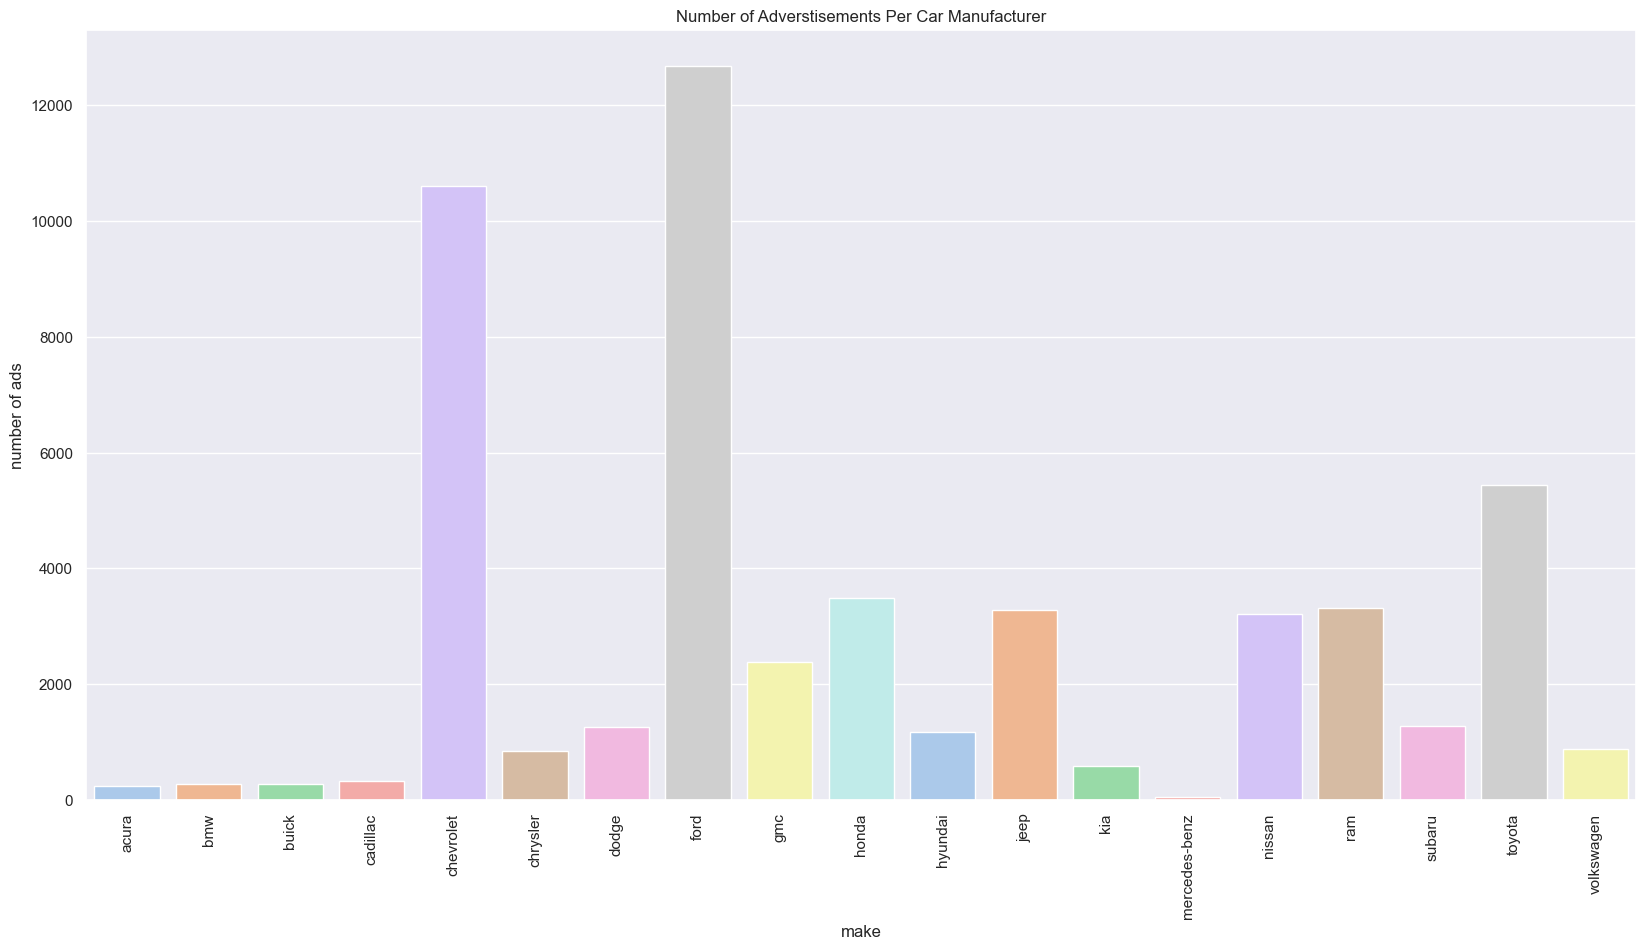

In [65]:
sns.barplot(x = 'make', y = 'number of ads', data = ads_by_make, palette='pastel')

plt.xticks(rotation=90)
plt.title('Number of Adverstisements Per Car Manufacturer')
 
plt.show()

In [35]:
fig = px.pie(ads_by_make,
             values='number of ads',
             names='make',
             title='Number of Ads Per Car Manufacturer',
             color='make',
             color_discrete_sequence=px.colors.qualitative.Light24)

fig.show()

### Ads by Manufacturer and Model

In [36]:
ads_by_make_model= pd.DataFrame(df_car_ads.groupby(['make', 'model_ind'])['model'].count())

ads_by_make_model.reset_index(inplace=True)

print(ads_by_make_model)

          make model_ind  model
0        acura        tl    236
1          bmw        x5    267
2        buick   enclave    271
3     cadillac  escalade    322
4    chevrolet    camaro    725
..         ...       ...    ...
75      toyota    sienna    329
76      toyota    tacoma    827
77      toyota    tundra    603
78  volkswagen     jetta    519
79  volkswagen    passat    350

[80 rows x 3 columns]


In [63]:
fig = px.sunburst(ads_by_make_model,
                  path=['make', 'model_ind'],
                  values='model',
                  color='model',
                  color_continuous_scale=px.colors.sequential.Plasma_r,
                 title='Make and Model of Car Sales')
fig.show()


### Ads by Type of Vehicle

In [38]:
ads_by_type= pd.DataFrame(df_car_ads.groupby('type')['make'].count())

ads_by_type.reset_index(inplace=True)

ads_by_type.columns = ['type', 'number_of_ads']

print(ads_by_type)

           type  number_of_ads
0           SUV          12405
1           bus             24
2   convertible            446
3         coupe           2303
4     hatchback           1047
5      mini-van           1161
6       offroad            214
7         other            256
8        pickup           6988
9         sedan          12154
10        truck          12353
11          van            633
12        wagon           1541


In [62]:
fig = px.bar(ads_by_type,
             x = 'type',
             y = 'number_of_ads',
             color='type',
             color_discrete_sequence=px.colors.qualitative.Light24,
            title='Number of Ads Per Vehicle Type')
fig.show()

### Average Price Per Manufacturer

In [68]:
avg_price_per_make= pd.DataFrame(df_car_ads.groupby('make')['price'].mean())

avg_price_per_make.reset_index(inplace=True)

print(avg_price_per_make)

             make         price
0           acura   6474.500000
1             bmw  10695.891386
2           buick  11439.612546
3        cadillac  17032.059006
4       chevrolet  14333.427104
5        chrysler   8182.738663
6           dodge   8067.058167
7            ford  12697.651989
8             gmc  15602.340622
9           honda   7317.624103
10        hyundai   7256.994885
11           jeep  12774.383420
12            kia   8616.570940
13  mercedes-benz  34900.000000
14         nissan   9346.470387
15            ram  18183.618818
16         subaru   8732.718553
17         toyota  10097.875115
18     volkswagen   7257.406214


In [41]:
num_ads_and_price_per_make= pd.DataFrame(avg_price_per_make.merge(ads_by_make,
                                                    on= 'make',
                                                    how= 'left'))

display(num_ads_and_price_per_make)

make         price  number of ads
0           acura   6474.500000            236
1             bmw  10695.891386            267
2           buick  11439.612546            271
3        cadillac  17032.059006            322
4       chevrolet  14333.427104          10611
5        chrysler   8182.738663            838
6           dodge   8067.058167           1255
7            ford  12697.651989          12672
8             gmc  15602.340622           2378
9           honda   7317.624103           3485
10        hyundai   7256.994885           1173
11           jeep  12774.383420           3281
12            kia   8616.570940            585
13  mercedes-benz  34900.000000             41
14         nissan   9346.470387           3208
15            ram  18183.618818           3316
16         subaru   8732.718553           1272
17         toyota  10097.875115           5445
18     volkswagen   7257.406214            869

In [61]:
fig = px.scatter(num_ads_and_price_per_make, x="price", y="number of ads",
                 size="number of ads", color="number of ads",
                 hover_name="make", log_x=True, size_max=60,
                 color_continuous_scale=px.colors.sequential.Plasma_r,
                title=' Price and Number of Ads Per Manufacturer')
fig.show()

### Averge Price Per Model Year

In [43]:
avg_price_per_year= pd.DataFrame(df_car_ads.groupby('model_year')['price'].mean())

avg_price_per_year.reset_index(inplace=True)

print(avg_price_per_year)

    model_year         price
0       1908.0  12995.000000
1       1929.0  18000.000000
2       1936.0   5000.000000
3       1948.0  21000.000000
4       1949.0  44900.000000
..         ...           ...
63      2015.0  18399.968101
64      2016.0  19571.258632
65      2017.0  20737.426209
66      2018.0  24516.171455
67      2019.0  26254.181579

[68 rows x 2 columns]


In [67]:
fig = px.line(avg_price_per_year, x="model_year", y="price", title='Average Price Per Model Year of Vehicle')

fig.show()

### Average Price Per Type of Car

In [44]:
avg_price_per_type= pd.DataFrame(df_car_ads.groupby('type')['price'].mean())

avg_price_per_type.reset_index(inplace=True)

print(avg_price_per_type)

           type         price
0           SUV  11149.400000
1           bus  17135.666667
2   convertible  14575.881166
3         coupe  14353.442901
4     hatchback   6868.513849
5      mini-van   8193.177433
6       offroad  14292.294393
7         other  10989.714844
8        pickup  16057.410418
9         sedan   6965.358647
10        truck  16734.894924
11          van  10546.941548
12        wagon   9088.134328


In [45]:
num_ads_and_price_per_type= pd.DataFrame(avg_price_per_type.merge(ads_by_type,
                                                    on= 'type',
                                                    how= 'left'))

display(num_ads_and_price_per_type)

type         price  number_of_ads
0           SUV  11149.400000          12405
1           bus  17135.666667             24
2   convertible  14575.881166            446
3         coupe  14353.442901           2303
4     hatchback   6868.513849           1047
5      mini-van   8193.177433           1161
6       offroad  14292.294393            214
7         other  10989.714844            256
8        pickup  16057.410418           6988
9         sedan   6965.358647          12154
10        truck  16734.894924          12353
11          van  10546.941548            633
12        wagon   9088.134328           1541

In [60]:
fig = px.scatter(num_ads_and_price_per_type, x="price", y="number_of_ads",
                 size="number_of_ads", color="number_of_ads",
                 hover_name="type", log_x=True, size_max=60,
                 color_continuous_scale=px.colors.sequential.Plasma_r,
                title= 'Number of Ads and Price of Sale Per Vehicle Type')
fig.show()

### Price Per Condition of Car

In [47]:
avg_price_per_condition= pd.DataFrame(df_car_ads.groupby('condition')['price'].mean())

avg_price_per_condition.reset_index(inplace=True)

print(avg_price_per_condition)

   condition         price
0  excellent  12806.669842
1       fair   3386.502178
2       good  10877.439067
3   like new  16677.445593
4        new  26050.300699
5    salvage   4242.295652


In [48]:
num_ads_per_condition= pd.DataFrame(df_car_ads.groupby('condition')['type'].count())

num_ads_per_condition.reset_index(inplace=True)

num_ads_per_condition.columns = ['condition', 'number_of_ads']

print(num_ads_per_condition)

   condition  number_of_ads
0  excellent          24773
1       fair           1607
2       good          20145
3   like new           4742
4        new            143
5    salvage            115


In [49]:
num_ads_and_price_per_condition= pd.DataFrame(avg_price_per_condition.merge(num_ads_per_condition,
                                                    on= 'condition',
                                                    how= 'left'))

display(num_ads_and_price_per_condition)

condition         price  number_of_ads
0  excellent  12806.669842          24773
1       fair   3386.502178           1607
2       good  10877.439067          20145
3   like new  16677.445593           4742
4        new  26050.300699            143
5    salvage   4242.295652            115

### Number of Days Listed Per Manufactuer

In [50]:
avg_days_per_make= pd.DataFrame(df_car_ads.groupby('make')['days_listed'].mean())

avg_days_per_make.reset_index(inplace=True)

print(avg_days_per_make)

             make  days_listed
0           acura    40.122881
1             bmw    42.419476
2           buick    39.206642
3        cadillac    41.869565
4       chevrolet    39.616153
5        chrysler    38.798329
6           dodge    40.347410
7            ford    39.455098
8             gmc    40.590833
9           honda    39.224964
10        hyundai    38.765558
11           jeep    39.537336
12            kia    41.835897
13  mercedes-benz    38.560976
14         nissan    38.760599
15            ram    40.000905
16         subaru    39.148585
17         toyota    39.414141
18     volkswagen    38.894131


### Number of Days Listed Per Year of Car

In [51]:
avg_days_per_year= pd.DataFrame(df_car_ads.groupby('model_year')['days_listed'].mean())

avg_days_per_year.reset_index(inplace=True)

print(avg_days_per_year)

    model_year  days_listed
0       1908.0    29.500000
1       1929.0    59.000000
2       1936.0    10.000000
3       1948.0    24.000000
4       1949.0    10.000000
..         ...          ...
63      2015.0    38.811315
64      2016.0    38.990183
65      2017.0    39.681687
66      2018.0    38.621979
67      2019.0    40.868421

[68 rows x 2 columns]


### Number of Days Listed Per Type of Car

In [52]:
avg_days_per_type= pd.DataFrame(df_car_ads.groupby('type')['days_listed'].mean())

avg_days_per_type.reset_index(inplace=True)

print(avg_days_per_type)

           type  days_listed
0           SUV    39.780895
1           bus    43.500000
2   convertible    39.192825
3         coupe    39.358663
4     hatchback    40.533906
5      mini-van    39.399655
6       offroad    40.397196
7         other    38.261719
8        pickup    39.283486
9         sedan    39.425045
10        truck    39.409536
11          van    40.695103
12        wagon    40.569111


### Number of days per Condition of Car

In [53]:
avg_days_per_condition= pd.DataFrame(df_car_ads.groupby('condition')['days_listed'].mean())

avg_days_per_condition.reset_index(inplace=True)

print(avg_days_per_condition)

   condition  days_listed
0  excellent    39.611714
1       fair    39.118233
2       good    39.631323
3   like new    39.166807
4        new    37.111888
5    salvage    39.008696


### Automatic vs Manual & Sale Price

In [54]:
price_per_transmission= df_car_ads.groupby('transmission')['price'].mean()

print(price_per_transmission)

transmission
automatic    12055.934139
manual        9887.836691
other        17672.877369
Name: price, dtype: float64


### Automatic vs Manual & Days Listed

In [55]:
price_per_transmission_duration= df_car_ads.groupby('transmission')['days_listed'].mean()

print(price_per_transmission_duration)

transmission
automatic    39.610933
manual       39.379286
other        38.362876
Name: days_listed, dtype: float64


### 4wd vs 2wd & sale price

In [56]:
price_per_drive= df_car_ads.groupby('is_4wd')['price'].mean()

print(price_per_drive)

is_4wd
0.0     9881.067691
1.0    12347.437598
Name: price, dtype: float64


### 4wd vs 2wd & days listed

In [57]:
price_per_drive_duration= df_car_ads.groupby('is_4wd')['days_listed'].mean()

print(price_per_drive_duration)

is_4wd
0.0    39.541527
1.0    39.556023
Name: days_listed, dtype: float64


### Color & Sale Price

In [58]:
price_per_color= df_car_ads.groupby('paint_color')['price'].mean()

print(price_per_color)

paint_color
black     13741.893786
blue      10269.714860
brown     10193.031071
custom    10030.104076
green      8426.977794
grey      11459.564622
orange    14654.346320
purple     6518.049020
red       11450.044786
silver    10667.568546
white     14147.443913
yellow    15682.223529
Name: price, dtype: float64


### Color & Days Listed

In [59]:
days_per_color= df_car_ads.groupby('paint_color')['days_listed'].mean()

print(days_per_color)

paint_color
black     39.725819
blue      40.203128
brown     40.548651
custom    38.637467
green     40.012178
grey      39.388922
orange    38.982684
purple    40.019608
red       39.514137
silver    39.272422
white     39.498056
yellow    39.815686
Name: days_listed, dtype: float64


### Price vs Days Listed

In [70]:
days_per_price= pd.DataFrame(df_car_ads.groupby('price')['days_listed'].mean())

days_per_price.reset_index(inplace=True)

print(days_per_price)

       price  days_listed
0          1    38.908521
1          3    22.000000
2          5     5.000000
3          6    53.000000
4          9    12.000000
...      ...          ...
3438  145000    29.000000
3439  175000    57.000000
3440  189000    53.500000
3441  300000    39.000000
3442  375000    21.000000

[3443 rows x 2 columns]


In [73]:
fig = px.line(days_per_price, x="price", y="days_listed", title='Average Price Per Days Advertisement is Listed')

fig.show()

# Conclusions

This exploratory data analysis served to determine various advertisement trends with a car sale dataset.  The analysis looked at various characteristics typical with automotives to determine trends related to length of sale, price of vehicle, condition of vehicle, and buyer preferences with transmission, color, make, and vehicle type.  The following inferences about these patterns include:
<br><br>
### Entire Dataset
1. There are several outliers in the price column over 100k which impact the data.  However, the vast majority of vehicle advertisements are under approximately 75k with the average price for all sales being 12k.
2. Although the highest number of days an ad was listed for was 271, the average number of days is 39.5
<br><br>
### Manufacturers
3. The most frequently advertised manufacterers are Ford and Chevrolet with 12,672 and 10,611 advertisements, respectively.  Furthermore, the F-150 and Silverado, were the two most popular types of vehicles within those brands.
4. The least advertised manufacterers are Mercedes-Benz and Acura with 41 and 236 ads, respectively
5. Mercedes-Benz had the highest average sale price of 34.9k even though they had the lowest number of advertisements
6. Price per vehicle, when outliers like classic cars or cars with significant after-market upgrades, typically increases the younger the model year.
<br><br>
### Customer Preferences
7. The average sale price for all the ads was 39.5k.  When looking at characteristics like color, transmission type, condition of vehicle, model year, type, and drive train, there is no significant difference in how long an ad is listed.  This means that customers are not purchasing cars based on these characteristics.
8. Price is not necessarily a deterent for purchasers as there does not appear to be a relationship between the number of days the ad is posted and the price of the car.
<br><br>
### Advertisement Trends
9. The most common types of ads are for SUV's, Sedans, and Trucks.  Trucks have the highest average price, followed by SUV's and then Sedans.
10. Even though SUV's, Sedans, and Trucks make up the bulk of the ads, there is no significant difference in how quickly they sell.  It is only an indicator of the most common types of cars
11. Resale price is more aligned with market norms based on the money factor of the manufacturer.